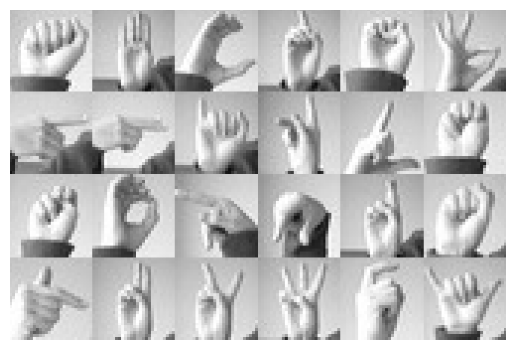

In [14]:
import cv2
import matplotlib.pyplot as plt
# Specify the path to your image file
image_path = "C:\\Users\\Admin\\Downloads\\amer_sign3.png"

# Read the image using OpenCV
image1 = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the uploaded image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()


In [15]:
import pandas as pd
# Specify the path to your CSV file
csv_file_path = "C:\\Users\\Admin\\Downloads\\archive\\sign_mnist_train.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape of the images (28x28 pixels, grayscale)
input_shape = (28, 28, 1)  # Height x Width x Channels (1 for grayscale)

# Define the number of filters for the first convolutional layer
num_filters = 32

# Define the size of the filter/kernel
kernel_size = (3, 3)  # You can adjust this based on the size of the input images and desired features to capture

# Define the activation function for the layer (e.g., ReLU)
activation = 'relu'

# Define the padding strategy (valid or same)
padding = 'same'  # Padding ensures that the output feature maps have the same spatial dimensions as the input

# Define the first convolutional layer
conv1 = layers.Conv2D(num_filters, kernel_size, activation=activation, padding=padding, input_shape=input_shape)

# Define the max pooling layer
pool1 = layers.MaxPooling2D(pool_size=(2, 2))  # Pooling window size is (2, 2)

# Define the model architecture
model = models.Sequential()
model.add(conv1)
model.add(pool1)

# Print model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Define the number of filters for the second convolutional layer
num_filters2 = 64  # You can adjust this based on the complexity of the features to capture

# Define the size of the filter/kernel for the second layer
kernel_size2 = (3, 3)  # Adjust based on the desired features to capture and the output of the first layer

# Define the activation function for the second layer
activation2 = 'relu'  # ReLU is commonly used for hidden layers

# Define the padding strategy for the second layer
padding2 = 'same'  # You can adjust this based on the desired output shape

# Define the second convolutional layer
conv2 = layers.Conv2D(num_filters2, kernel_size2, activation=activation2, padding=padding2)


In [17]:
from tensorflow.keras import layers

# Define the first convolutional layer
conv1 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))

# Define the second convolutional layer
conv2 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')

# Define the activation function for ReLU
activation_relu = layers.ReLU()

# Add the ReLU activation function after each convolutional layer
model = tf.keras.Sequential([
    conv1,
    activation_relu,
    conv2,
    activation_relu,
    # Add more layers as needed
])

In [18]:
from tensorflow.keras import layers

# Define the max pooling layer
max_pooling = layers.MaxPooling2D(pool_size=(2, 2))

# Define the dropout layer
dropout = layers.Dropout(0.2)

# Define the output layer
output_layer = layers.Dense(26, activation='softmax')

# Add max pooling, dropout, and output layers to the model
model = tf.keras.Sequential([
    # Previous convolutional layers
    conv1,
    activation_relu,
    max_pooling,
    conv2,
    activation_relu,
    max_pooling,
    # Add more convolutional layers followed by max pooling if needed
    # Flatten layer to convert 2D feature maps to 1D vectors
    layers.Flatten(),
    # Fully connected (dense) layer
    layers.Dense(128, activation='relu'),
    dropout,
    # Output layer
    output_layer
])


In [19]:

from tensorflow.keras.utils import plot_model

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
train_df = pd.read_csv("C:\\Users\\Admin\\Downloads\\archive\\sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [22]:
train_df.columns


Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [23]:
train_df.label.value_counts()

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64

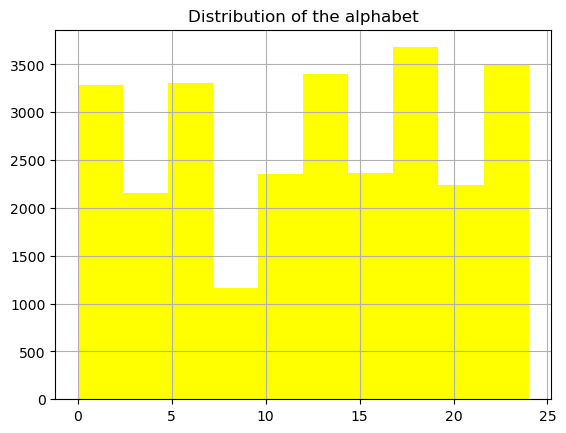

In [24]:
train_df.label.hist(color='yellow',bins=10)
plt.title("Distribution of the alphabet")
plt.show()

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
# this will be the directory of our training set

TRAINING_FILE = "C:\\Users\\Admin\\Downloads\\archive\\sign_mnist_train.csv"

In [85]:
with open(TRAINING_FILE) as training_file:
    line = training_file.readline()
    print(f"First line (header) looks like this:\n{line}")
    line = training_file.readline()
    print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [86]:
def parse_data_from_input(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=',')
        imgs = []
        labels = []
        next(reader, None)
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

    images = np.array(imgs).astype(float)
    labels = np.array(labels).astype(float)
    return images, labels

In [87]:
import csv
import numpy as np

def parse_data_from_input(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=',')
        next(reader)  # Skip the header row
        imgs = []
        labels = []
        for row in reader:
            label = row[0]
            data = row[1:]
             # Remove empty strings
            data = [pixel for pixel in data if pixel]
            # Convert string elements to integers
            data = [int(pixel) for pixel in data]
            # Check if the size of data matches the expected size (28*28 = 784)
            if len(data) != 784:
                print(f"Skipping invalid data for label {label}: {data}")
                continue
            # Reshape the data into a 28x28 array
            img = np.array(data).reshape((28, 28))
            imgs.append(img)
            labels.append(label)
    return np.array(imgs), np.array(labels)

# Usage example
TRAINING_FILE = "C:\\Users\\Admin\\Downloads\\archive\\sign_mnist_train.csv"

training_images, training_labels = parse_data_from_input(TRAINING_FILE)

print(f"Training images has shape: {training_images.shape}")
print(f"Training labels has shape: {training_labels.shape}")

Training images has shape: (27455, 28, 28)
Training labels has shape: (27455,)


In [32]:
train_df = pd.read_csv("C:\\Users\\Admin\\Downloads\\archive\\sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [89]:
from keras.utils import to_categorical

def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    training_images = np.expand_dims(training_images, axis=3)
    validation_images = np.expand_dims(validation_images, axis=3)

    # No need to one-hot encode labels for sparse categorical crossentropy loss

    # Instantiate the ImageDataGenerator class for training data
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    train_generator = train_datagen.flow(x=training_images,
                                         y=training_labels,
                                         batch_size=32)

    # Instantiate the ImageDataGenerator class for validation data
    validation_datagen = ImageDataGenerator(
        rescale=1 / 255
    )
    validation_generator = validation_datagen.flow(x=validation_images,
                                                   y=validation_labels,
                                                   batch_size=32)

    return train_generator, validation_generator


In [90]:
# Test our generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the dataset from CSV
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\archive\\sign_mnist_train.csv")

# Convert dataframe to numpy arrays
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Reshape and normalize the features
X = X.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot encoded vectors
y = to_categorical(y, num_classes=26)  # Corrected one-hot encoding

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the dataset as numpy arrays
np.save("hand_sign_images.npy", X)
np.save("hand_sign_labels.npy", y)

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),  # Add dropout layer to prevent overfitting
    Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Overfitting occurs in the project when when-
1. The model achieves significantly higher accuracy on the training dataset compared to the validation dataset. This indicates that the model has memorized the training data and may not generalize well to unseen data.
2. Overfitting can also be detected by observing a large gap between the training and validation loss. If the training loss continues to decrease while the validation loss starts to increase or remains stagnant, it suggests that the model is overfitting to the training data.
3. The model is too complex relative to the size and complexity of the dataset. Complex models with a large number of parameters have a higher capacity to memorize noise in the training data, leading to overfitting.
4. Inadequate use of regularization techniques such as dropout or weight decay can exacerbate overfitting. Regularization helps prevent the model from becoming overly reliant on specific features in the training data by introducing penalties for large parameter values.
5. The dataset is small, as the model may not have enough diverse examples to learn robust patterns and generalize well to unseen data.

CNN handles overfitting-
1. Convolutional Layers: CNNs use convolutional layers to automatically extract relevant features from input data, reducing the need for manual feature engineering. By learning hierarchical representations of the data, CNNs can capture patterns at different levels of abstraction, potentially reducing the risk of overfitting.
2. Pooling Layers: Max pooling layers in CNNs help reduce the spatial dimensions of feature maps, leading to a more compact representation of the data. This can help prevent overfitting by reducing the model's sensitivity to small variations in input data.
3. Dropout: Dropout is a regularization technique commonly used in CNNs to prevent overfitting. It works by randomly dropping a certain percentage of neurons during training, forcing the model to learn more robust features and reducing reliance on specific neurons.
4. Data Augmentation: CNNs can benefit from data augmentation techniques such as rotation, translation, and flipping, which artificially increase the size and diversity of the training dataset. This helps expose the model to a wider range of variations in the data, reducing the risk of overfitting.
5. Early Stopping: Monitoring the validation loss during training and stopping the training process when the validation loss starts to increase can prevent the model from overfitting to the training data. This technique, known as early stopping, helps find the optimal balance between model complexity and generalization performance.

Adding another dropout layer after the convolutional layers with a dropout rate of 0.3 can potentially help further reduce overfitting in the CNN model by-
1. Increased Regularization: Dropout introduces randomness by randomly deactivating neurons during training. By adding another dropout layer after the convolutional layers, you increase the regularization effect, making it more challenging for the model to memorize the training data and reducing the risk of overfitting.
2. Enhanced Generalization: The additional dropout layer helps the model learn more robust features by preventing co-adaptation of neurons. This encourages the network to learn more diverse representations of the data, leading to better generalization performance on unseen data.
3. Reduced Sensitivity to Noise: Dropout layers make the model less sensitive to noise and small variations in the input data. By randomly dropping out neurons, the model learns to rely on more stable features, which can help improve performance on noisy or imperfect data and reduce overfitting.

Our project handles-
1. Share structure property: The code utilizes convolutional layers (layers.Conv2D) which inherently leverage the share structure property. By sharing weights (filters) across different spatial locations in the input image, the model learns to detect features that are relevant across the entire image. This property allows the model to efficiently learn and extract features without needing to learn them independently for every location.
2. Invariance property: The addition of the max pooling layer (layers.MaxPooling2D) after the convolutional layer contributes to the model's ability to capture the invariance property. Max pooling reduces the spatial dimensions of the feature maps by taking the maximum value within each pooling window. This downsampling helps the model become more robust to small variations in the input, such as translations, by focusing on the most salient features and discarding less relevant details.
